TP2 -CLASE 3
IMplementar la funcion create_gauss_filter(h,w,k_size,sigama) para crear filtros gaussianos para filtrado espectral. Debe retornar un filtro gausssiano de tamaño HxW en dominio espacial y su transformada de fourier.
1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. APlicar el filtro una imagen para validar el funcionamiento en el dominio espectral.

<ipython-input-24-1939df4629f1>:57: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plot_image(image, filtered_image_spec, filtered_image_space, plt.subplot(1, 3, 1), plt.subplot(1, 3, 2), plt.subplot(1, 3, 3))


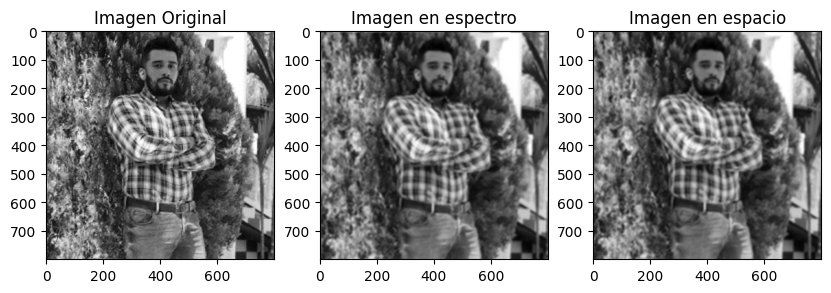

In [24]:
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
path = '/content/perfil.jpeg'
image = cv.imread(path, cv.IMREAD_GRAYSCALE)
def gaussian_kernel(size, sigma):
    x, y = np.meshgrid(np.arange(size) - size // 2, np.arange(size) - size // 2)
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(kernel)
    return kernel

def apply_filter(image, kernel):
    image_fft = np.fft.fft2(image)
    kernel_fft = np.fft.fft2(kernel, s=image.shape)
    filtered_image = np.fft.ifft2(image_fft * kernel_fft)
    filtered_image = np.real(filtered_image)
    filtered_image = filtered_image.astype(np.uint8)
    return filtered_image

def plot_filter_and_fft(kernel, kernel_fft, k_size, sigma, ax1, ax2):
    ax1.imshow(kernel, cmap='gray')
    ax1.set_title(f'Kernel k_size={k_size}, sigma={sigma}')
    ax2.imshow(np.abs(np.fft.fftshift(kernel_fft)), cmap='gray')
    ax2.set_title(f'Kernel FFT k_size={k_size}, sigma={sigma}')

def plot_image(image, filtered_image_spec, filtered_image_space, ax1, ax2, ax3):
    ax1.imshow(image, cmap='gray')
    ax1.set_title('Imagen Original')
    ax2.imshow(filtered_image_spec, cmap='gray')
    ax2.set_title('Imagen en espectro')
    ax3.imshow(filtered_image_space, cmap='gray')
    ax3.set_title('Imagen en espacio')

k_sizes = [5, 15, 25, 35, 45, 55]
sigmas = [5, 15,  25, 35, 45, 55]
k_size = 9
sigma = 5

# Kernel
kernel = gaussian_kernel(k_size, sigma)
kernel_fft = np.fft.fft2(kernel)

# Imagen
path = '/content/perfil.jpeg'
image = cv.imread(path, cv.IMREAD_GRAYSCALE)

filtered_image_spec = apply_filter(image, kernel)

filtered_image_space = cv.GaussianBlur(image, (k_size, k_size), sigma)
#Graficas
fig, axes = plt.subplots(len(k_sizes), 2, figsize=(10, 5*len(k_sizes)))
for i, k_size in enumerate(k_sizes):
    kernel = gaussian_kernel(k_size, sigmas[i])
    kernel_fft = np.fft.fft2(kernel, s=image.shape)
    plot_filter_and_fft(kernel, kernel_fft, k_size, sigmas[i], axes[i, 0], axes[i, 1])
plot_image(image, filtered_image_spec, filtered_image_space, plt.subplot(1, 3, 1), plt.subplot(1, 3, 2), plt.subplot(1, 3, 3))
plt.show()



2. Usando el metodo descripto en el paper image sharpnes measure for blurred images in frequency domain " comparar el resultado de unfiltrado pro convolucion con el filtrado especral"

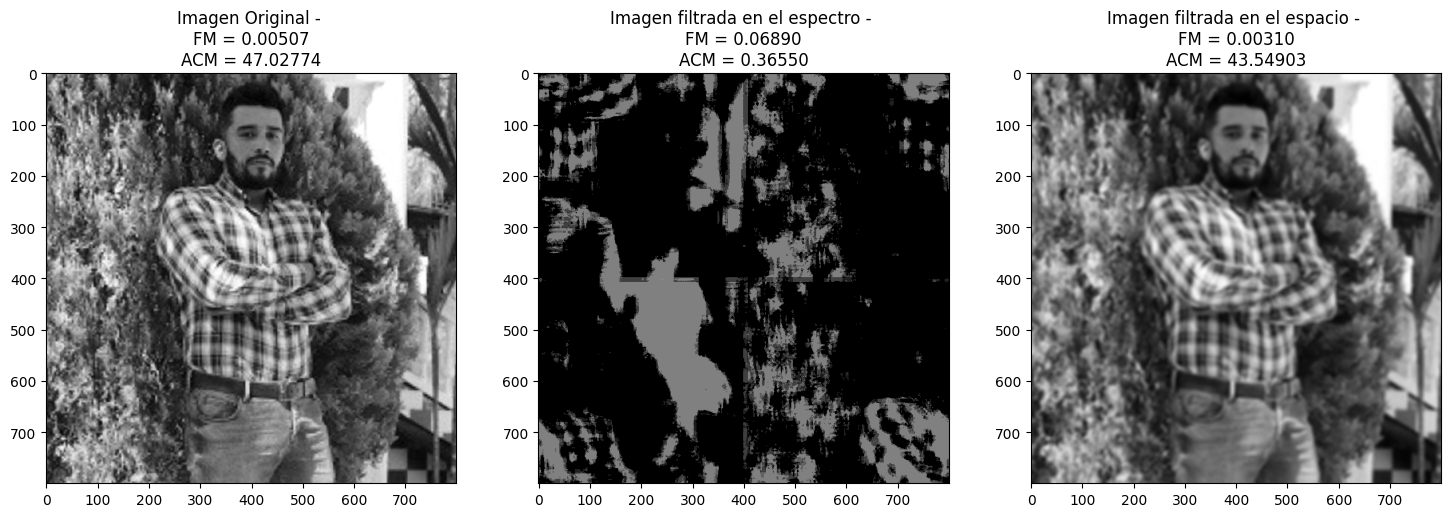

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def FM_calc(image):
    F = np.fft.fft2(image)
    Fc = np.fft.fftshift(F)
    AF = np.abs(Fc)
    Max_AF = np.max(AF)
    Th = len(F[F > Max_AF/1000])
    FM = Th / (image.shape[0] * image.shape[1])
    return FM

def ACM_calc(image):
    ACM = 0
    histogram = cv.calcHist([image], [0], None, [256], [0, 256])
    mean = np.mean(image)
    for i in range(len(histogram)):
        ACM += histogram[i] * np.abs(i - mean)
    ACM = ACM / (image.shape[0] * image.shape[1])
    return ACM[0]

def create_gauss_filter(height, width, k_size=9, sigma=5):
    x = np.linspace(-int(height/2), int(height/2), height)
    y = np.linspace(-int(width/2), int(width/2), width)
    xx, yy = np.meshgrid(x, y)
    kernel = np.exp(-(xx**2 + yy**2)/(2*(sigma**2)))
    kernel = kernel / (2*np.pi*(sigma**2))
    kernel = kernel / np.sum(kernel)
    kernel_fft = np.fft.fft2(kernel)
    return kernel, kernel_fft

path = '/content/perfil.jpeg'
image = cv.imread(path, cv.IMREAD_GRAYSCALE)

k_size = 9
sigma = 5
filtro = cv.getGaussianKernel(k_size, sigma)
filtro = np.outer(filtro, filtro)
filtro_fft = np.fft.fftshift(np.fft.fft2(filtro, s=image.shape[:2]), axes=(0, 1))
image_fft = np.fft.fft2(image)
image_filtered_spec = image_fft * filtro_fft
image_filtered_spec = np.fft.ifftshift(np.real(np.fft.ifft2(image_filtered_spec))).astype(np.uint8)
image_filtered_space = cv.GaussianBlur(image, (k_size, k_size), sigma)

# Grafica
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 12))
ax1.imshow(image, cmap='gray')
ax1.set_title(f'Imagen Original - \nFM = {FM_calc(image):.5f}\nACM = {ACM_calc(image):.5f}')
ax2.imshow(image_filtered_spec, cmap='gray')
ax2.set_title(f'Imagen filtrada en el espectro - \nFM = {FM_calc(image_filtered_spec):.5f}\nACM = {ACM_calc(image_filtered_spec):.5f}')
ax3.imshow(image_filtered_space, cmap='gray')
ax3.set_title(f'Imagen filtrada en el espacio - \nFM = {FM_calc(image_filtered_space):.5f}\nACM = {ACM_calc(image_filtered_space):.5f}')

plt.show()

# 3. Repetir la comparacion usando uno de los metodos descriptos en el apendice del paper analysis of focus measre operatrs in shape form- focus

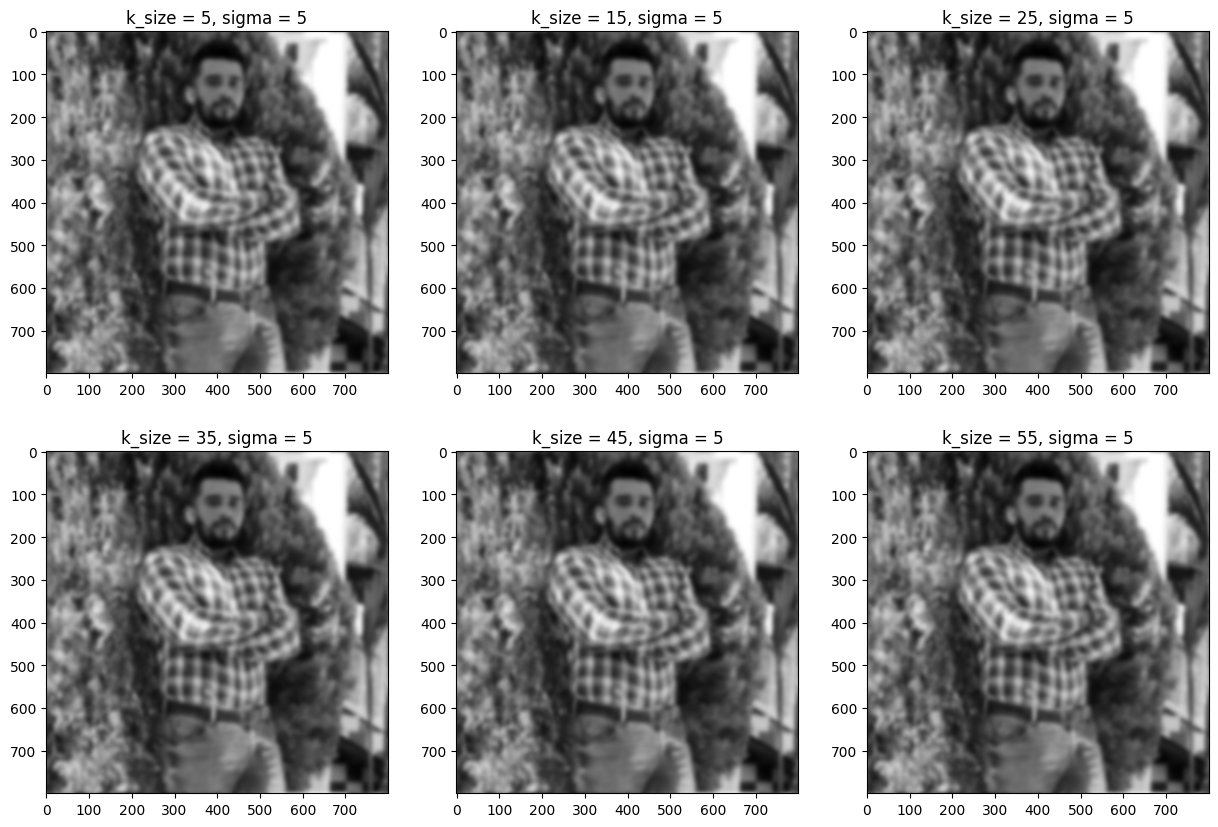

In [20]:

k_sizes = [5, 15, 25, 35, 45, 55]
sigmas = [5, 15,  25, 35, 45, 55]


data = {'k_size': [],
        'sigma': [],
        'FM_SPEC': [],
        'ACM_SPEC': [],
        'FM_SPACE': [],
        'ACM_SPACE': []}

fig, axes = plt.subplots(int(np.ceil(len(k_sizes)/3)), 3, figsize=(15, 5*np.ceil(len(k_sizes)/3)))
for i, k_size in enumerate(k_sizes):
    for j, sigma in enumerate(sigmas):
        filtro, filtro_fft = create_gauss_filter(image.shape[0], image.shape[1], k_size=k_size, sigma=sigma)
        #Imagen con Gaussian 
        image_filtered_space = cv.GaussianBlur(image, (k_size,k_size), sigma)
        
        #Imagen en el espectro
        image_fft = np.fft.fft2(image)
        image_filtered_spec = image_fft * filtro_fft
        image_filtered_spec = np.fft.ifftshift(np.real(np.fft.ifft2(image_filtered_spec))).astype(np.uint8)
        
       #Metricas
        metrics = [k_size, sigma, FM_calc(image_filtered_spec), ACM_calc(image_filtered_spec), FM_calc(image_filtered_space), ACM_calc(image_filtered_space)]
        df_metrics.loc[len(df_metrics)] = metrics

        #Grafica
        if j==0:
            plot_row = i // 3
            plot_col = i % 3
            ax = axes[plot_row, plot_col]
            ax.imshow(image_filtered_spec, cmap='gray')
            ax.set_title(f'k_size = {k_size}, sigma = {sigma}')